In [1]:
# Assignment 3 by Mimi Trinh
RANDOM_SEED = 1
SET_FIT_INTERCEPT = True
import numpy as np
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
boston_input = pd.read_csv('boston.csv')
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [3]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [4]:
boston_input.shape

(506, 14)

In [5]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())
# no NA value, no need to address missing value issue


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [6]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [7]:
boston.shape

(506, 13)

In [8]:
# create model data with the first column as response variable (mv) and remaining columns as predictor variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [9]:
# best practice to standardize variables into a single scale
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [10]:
model_data = scaler.fit_transform(prelim_model_data)
# use this model data for analysis after scaler transformation
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [11]:
visual_data=pd.DataFrame(model_data)
visual_data.columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
mv         506 non-null float64
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
lstat      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Text(0.5,1,'Median Values of Homes in Thousands of 1970 Dollars')

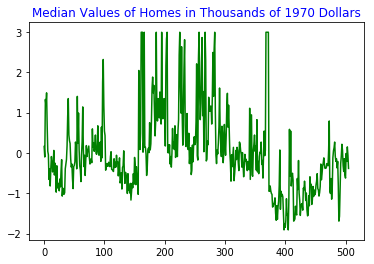

In [12]:
plt.plot(visual_data.mv,color='green')
plt.title('Median Values of Homes in Thousands of 1970 Dollars',color='blue')

Text(0.5,1,'Median Values of Homes in Thousands of 1970 Dollars')

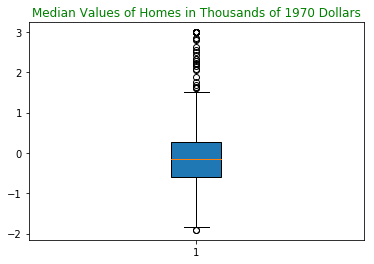

In [13]:
plt.boxplot(visual_data.mv,patch_artist=True)
plt.title('Median Values of Homes in Thousands of 1970 Dollars',color='green')
# there are many outliers in response variable, skewing toward the right 
# no outlier outside +/-3, so no extreme outlier

In [14]:
corr_matrix=visual_data.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

Text(0,0.5,'Median Value of Homes in Thousands of 1970 Dollars')

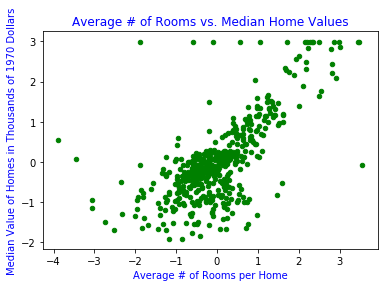

In [15]:
visual_data.plot(kind='scatter',x='rooms',y='mv',color='green')
plt.title('Average # of Rooms vs. Median Home Values',color='blue')
plt.xlabel('Average # of Rooms per Home',color='blue')
plt.ylabel('Median Value of Homes in Thousands of 1970 Dollars',color='blue')

Text(0,0.5,'Median Value of Homes in Thousands of 1970 Dollars')

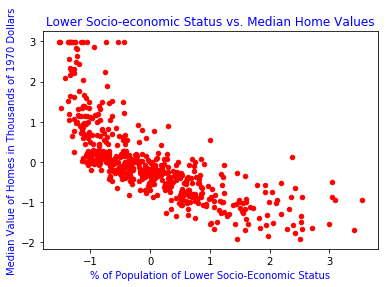

In [16]:
visual_data.plot(kind='scatter',x='lstat',y='mv',color='red')
plt.title('Lower Socio-economic Status vs. Median Home Values',color='blue')
plt.xlabel('% of Population of Lower Socio-Economic Status',color='blue')
plt.ylabel('Median Value of Homes in Thousands of 1970 Dollars',color='blue')

In [17]:
visual_data.head()

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
0,0.160376,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.101258,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,1.326830,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,1.185112,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,1.490352,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [18]:
visual_data.tail()

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
501,-0.014047,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147
502,-0.210273,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850
503,0.149475,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048
504,-0.057653,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302
505,-0.384696,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,-0.669058


In [19]:
model_data

array([[ 0.16037616, -0.41978194,  0.28482986, ..., -0.66660821,
        -1.45900038, -1.0755623 ],
       [-0.10125846, -0.41733926, -0.48772236, ..., -0.98732948,
        -0.30309415, -0.49243937],
       [ 1.32683049, -0.41734159, -0.48772236, ..., -0.98732948,
        -0.30309415, -1.2087274 ],
       ...,
       [ 0.14947472, -0.41344658, -0.48772236, ..., -0.80321172,
         1.17646583, -0.98304761],
       [-0.05765269, -0.40776407, -0.48772236, ..., -0.80321172,
         1.17646583, -0.86530163],
       [-0.38469596, -0.41500016, -0.48772236, ..., -0.80321172,
         1.17646583, -0.66905833]])

In [20]:
y=model_data[:, :1]
y

array([[ 0.16037616],
       [-0.10125846],
       [ 1.32683049],
       [ 1.18511174],
       [ 1.49035213],
       [ 0.67274395],
       [ 0.04046029],
       [-0.04675124],
       [-0.65723202],
       [-0.3955974 ],
       [-0.82075365],
       [-0.3955974 ],
       [-0.09035701],
       [-0.23207576],
       [-0.4719075 ],
       [-0.28658298],
       [ 0.06226318],
       [-0.54821759],
       [-0.25387865],
       [-0.4719075 ],
       [-0.97337384],
       [-0.3192873 ],
       [-0.79895077],
       [-0.87526086],
       [-0.755345  ],
       [-0.94066952],
       [-0.64633057],
       [-0.84255654],
       [-0.45010461],
       [-0.16666711],
       [-1.07148682],
       [-0.87526086],
       [-1.01697961],
       [-1.02788106],
       [-0.98427529],
       [-0.3955974 ],
       [-0.27568153],
       [-0.16666711],
       [ 0.18217904],
       [ 0.90167424],
       [ 1.34863337],
       [ 0.44381366],
       [ 0.30209491],
       [ 0.23668626],
       [-0.14486423],
       [-0

In [21]:
x=model_data[:,1:13]
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.66660821,
        -1.45900038, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.66905833]])

In [22]:
# model 1: linear regression
linear=LinearRegression()
linear.fit(x,y)
linear.score(x,y) 
# this is R2

0.7382022164245633

In [23]:
linear_predict=linear.predict(x)
sqrt(mean_squared_error(y,linear_predict)) 
# RMSE of linear regression 

0.5116617863153713

In [24]:
scores1=cross_val_score(linear, x, y, cv=10, scoring='neg_mean_squared_error')
scores1=np.sqrt(-scores1)
scores1 
# RMSE scores using 10 fold cross validation

array([0.30803384, 0.41488852, 0.4389384 , 0.6522438 , 0.62178338,
       0.49601153, 0.34382819, 1.34082722, 0.66970479, 0.33313776])

In [25]:
scores1.mean()
# mean of 10 RMSE scores

0.5619397427745956

In [26]:
# model 2: ridge regression
ridge=Ridge(alpha=10).fit(x,y)
ridge.score(x,y)
# lower R2 than linear regression, linear regression is better model

0.737311366859988

In [27]:
ridge_predict=ridge.predict(x)
np.sqrt(mean_squared_error(y,ridge_predict))
# higher RMSE, linear regression is better model

0.5125315923335965

In [28]:
scores2=cross_val_score(ridge, x, y, cv=10, scoring='neg_mean_squared_error')
scores2=np.sqrt(-scores2)
scores2 
# RMSE scores using 10 fold cross validation

array([0.29745185, 0.39833127, 0.41122133, 0.66202064, 0.61017922,
       0.49661353, 0.32827755, 1.32877669, 0.66597138, 0.3117246 ])

In [29]:
scores2.mean()
# lower mean of 10 RMSE, ridge regression is better model 

0.5510568066673047

In [30]:
# conclusion: ridge regression is better than linear regression 
# b/c mean of 10 RMSE of ridge regression < mean of 10 RMSE of linear regression using 10 fold cross validation

In [31]:
lasso=Lasso().fit(x,y)
lasso.score(x,y)
# really bad R2

0.0

In [32]:
lasso_predict=lasso.predict(x)
np.sqrt(mean_squared_error(y,lasso_predict))
# really bad RMSE

1.0

In [33]:
scores3=cross_val_score(lasso, x, y, cv=10, scoring='neg_mean_squared_error')
scores3=np.sqrt(-scores3)
scores3 
# RMSE scores using 10 fold cross validation

array([0.68692133, 0.60505313, 0.61130881, 1.50065271, 1.11517078,
       1.43264965, 0.44376355, 1.46671463, 1.18632611, 0.63230127])

In [34]:
scores3.mean()
# really bad (high) mean of 10 RMSE scores using 10 fold cross validation

0.9680861979539465

In [35]:
# conclusion: ridge model is still winning here with lowest mean of 10 RMSE

In [36]:
elastic=ElasticNet().fit(x,y)
elastic.score(x,y)
# very low R2

0.26444537207526786

In [37]:
elastic_predict=elastic.predict(x)
np.sqrt(mean_squared_error(y,elastic_predict))
# very high RMSE

0.8576448145501331

In [38]:
scores4=cross_val_score(elastic, x, y, cv=10, scoring='neg_mean_squared_error')
scores4=np.sqrt(-scores4)
scores4 
# RMSE scores using 10 fold cross validation

array([0.54513257, 0.48204764, 0.42813805, 1.3792635 , 0.98632206,
       1.32624965, 0.39635972, 1.36985316, 1.07940418, 0.50759119])

In [39]:
scores4.mean()
# still very high RMSE mean

0.8500361711142794

In [40]:
# conclusion: using the mean of 10 RMSE scores of 10 fold cross validation, best model is ridge regression
# in order of ridge > linear > elastic net > lasso 

In [41]:
ridge.intercept_
# intercept of ridge regression

array([-7.72059356e-16])

In [42]:
ridge.coef_
# coefficients of ridge regression

array([[-0.1043611 ,  0.10798955, -0.00773088,  0.08141609, -0.2090253 ,
         0.28701971,  0.0039542 , -0.31983606,  0.21136091, -0.18369383,
        -0.20686589, -0.41898584]])

In [43]:
# Thank you for viewing my code!